# Reporte 2
## A1.2 Regresión lineal

En este reporte se busca analizar la relacion de la felicidad de los países a partir de variables económicas y sociales. Se comparó un modelo simple basado solo en el GDP con un modelo múltiple que incorpora educación, esperanza de vida y apoyo social. Los resultados muestran que el modelo múltiple ofrece una visión más completa del bienestar, al integrar factores que van más allá de la economía.

1. En este conjunto de datos se incluye información de 141 países, con variables como el nivel de felicidad y el Producto Interno Bruto (GDP). Los valores de felicidad oscilan entre 2.43 y 7.82, mientras que el GDP varía ampliamente, desde economías pequeñas hasta países con PIB grandes. De esta manera se puede explorar cómo el desarrollo económico se relaciona con el bienestar subjetivo.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv("Felicidad.csv")
df.head(15)

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
5,Luxembourg,7.4040,7.335313e+10
6,Sweden,7.3843,5.414870e+11
7,Norway,7.3651,3.621980e+11
8,Israel,7.3638,4.071010e+11
9,New Zealand,7.1998,2.117350e+11


In [25]:
#Genera
df.describe()

,Felicidad,GDP
count,141.000000,1.410000e+02
mean,5.560004,5.889942e+11
std,1.098011,2.221612e+12
min,2.403800,1.223876e+09
25%,4.887900,1.805117e+10
50%,5.585300,6.215800e+10
75%,6.309100,3.452960e+11
max,7.821000,2.089370e+13


In [26]:
df.info

<bound method DataFrame.info of             Pais  Felicidad           GDP
0        Finland     7.8210  2.718370e+11
1        Denmark     7.6362  3.560850e+11
2        Iceland     7.5575  2.171808e+10
3    Switzerland     7.5116  7.522480e+11
4    Netherlands     7.4149  9.138650e+11
..           ...        ...           ...
136     Botswana     3.4711  1.493007e+10
137       Rwanda     3.2682  1.018435e+10
138     Zimbabwe     2.9951  1.805117e+10
139      Lebanon     2.9553  2.594892e+10
140  Afghanistan     2.4038  2.011614e+10

[141 rows x 3 columns]>

In [27]:
df.shape

(141, 3)

Se hace una correlación aproximada de GDP y felicidad La correlación entre GDP y felicidad es positiva pero débil (r = 0.17), lo que indica que el PIB influye ligeramente en el bienestar, pero no lo explica por completo. Esto refuerza la necesidad de incluir más variables en el análisis.

In [28]:
df[['GDP','Felicidad']].corr()

,GDP,Felicidad
GDP,1.000000,0.172159
Felicidad,0.172159,1.000000


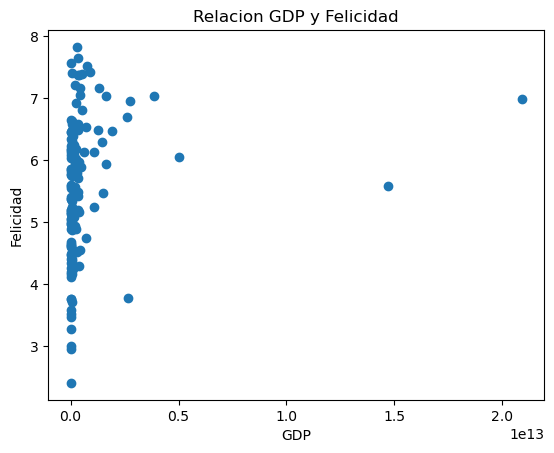

In [29]:
plt.scatter(df['GDP'], df['Felicidad'])
plt.xlabel('GDP')
plt.ylabel('Felicidad')
plt.title('Relacion GDP y Felicidad')
plt.show()

2. El modelo simple muestra que el GDP tiene una relación positiva y significativa con la felicidad, pero su capacidad explicativa es limitada (R² = 0.030). Esto sugiere que la felicidad depende de factores adicionales, lo que motiva la construcción de un modelo múltiple más completo. Con esto se evidencia que el crecimiento económico, aunque relevante, no es suficiente para comprender el fenómeno de la felicidad en su totalidad. Por ello, se plantea la necesidad de construir un modelo de regresión múltiple que incorpore variables sociales y de salud, como la esperanza de vida, la inversión en educación y el gasto en salud, con el fin de obtener una visión más integral y precisa de los factores que influyen en el bienestar de las naciones.

In [30]:
X = df["GDP"]
y = df["Felicidad"]
X = sm.add_constant(X)

In [32]:
modelo_simple = sm.OLS(y, X).fit() #Mínimos Cuadrados Ordinarios
print(modelo_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.246
Date:                Sun, 25 Jan 2026   Prob (F-statistic):             0.0412
Time:                        20:39:45   Log-Likelihood:                -210.63
No. Observations:                 141   AIC:                             425.3
Df Residuals:                     139   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5099      0.095     58.247      0.0

3. Con el fin de obtener un modelo más completo y representativo, se amplió el conjunto de datos inicial incorporando tres variables adicionales de carácter social y de salud. La extensión del conjunto de datos considerando 3 variables son: la esperanza de vida, porcentaje de inversión al sector salud y de educación respecto al PIB (GDP). La integración de estas variables se realizó mediante la unión de bases de datos oficiales (World Bank, WHO, UNDP), filtrando únicamente los países de interés y eliminando aquellos con valores faltantes para asegurar consistencia en el análisis. 

In [36]:
df_2 = pd.read_csv("Nuevas Variables.csv")
df_2.head(10)

,Pais,EsperanzaDeVida,InversionSalud,InversionEducacion
0,Aruba,76.226000,NaN,NaN
1,Africa Eastern and Southern,64.487020,5.657045,3.697668
2,Afghanistan,65.617000,23.088169,NaN
3,Africa Western and Central,57.987813,4.219883,2.891687
4,Angola,64.246000,2.927376,2.385359
5,Albania,78.769000,6.193681,2.729770
6,Andorra,84.016000,7.536788,2.647280
7,Arab World,71.876096,4.440567,NaN
8,United Arab Emirates,80.487000,4.675509,NaN
9,Argentina,75.806000,9.863053,4.792630


In [37]:
df_nuevo = pd.merge(df, df_2, on="Pais", how="inner")

In [53]:
df_nuevo.head(15)

,Pais,Felicidad,GDP,EsperanzaDeVida,InversionSalud,InversionEducacion
0,Finland,7.8210,2.718370e+11,81.187805,9.658922,6.37604
1,Denmark,7.6362,3.560850e+11,81.304878,9.475862,6.35587
2,Iceland,7.5575,2.171808e+10,82.119512,9.285939,7.28924
3,Switzerland,7.5116,7.522480e+11,83.604878,11.706533,4.92419
4,Netherlands,7.4149,9.138650e+11,81.614634,10.100683,5.17918
5,Luxembourg,7.4040,7.335313e+10,82.946341,5.551548,3.70599
6,Sweden,7.3843,5.414870e+11,83.058537,10.498570,7.31910
7,Norway,7.3651,3.621980e+11,82.509756,7.948033,5.45586
8,Israel,7.3638,4.071010e+11,82.700000,7.341618,5.93497
9,New Zealand,7.1998,2.117350e+11,81.958537,10.028581,5.22557


4. El nuevo conjunto de los nuevos datos integrados permiten construir un modelo de regresión múltiple que considera factores económicos, sociales y de salud, ofreciendo una visión más integral de los determinantes de la felicidad.

In [54]:
df_nuevo = df_nuevo.dropna()
df_nuevo.head(15)

,Pais,Felicidad,GDP,EsperanzaDeVida,InversionSalud,InversionEducacion
0,Finland,7.8210,2.718370e+11,81.187805,9.658922,6.37604
1,Denmark,7.6362,3.560850e+11,81.304878,9.475862,6.35587
2,Iceland,7.5575,2.171808e+10,82.119512,9.285939,7.28924
3,Switzerland,7.5116,7.522480e+11,83.604878,11.706533,4.92419
4,Netherlands,7.4149,9.138650e+11,81.614634,10.100683,5.17918
5,Luxembourg,7.4040,7.335313e+10,82.946341,5.551548,3.70599
6,Sweden,7.3843,5.414870e+11,83.058537,10.498570,7.31910
7,Norway,7.3651,3.621980e+11,82.509756,7.948033,5.45586
8,Israel,7.3638,4.071010e+11,82.700000,7.341618,5.93497
9,New Zealand,7.1998,2.117350e+11,81.958537,10.028581,5.22557


In [55]:
xm = df_nuevo[["GDP", "EsperanzaDeVida", "InversionSalud", "InversionEducacion"]]
ym = df_nuevo["Felicidad"]

In [56]:
xm = sm.add_constant(xm)

In [57]:
modelo_multiple = sm.OLS(ym, xm).fit()
print(modelo_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     40.72
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           3.28e-20
Time:                        21:32:42   Log-Likelihood:                -107.07
No. Observations:                 105   AIC:                             224.1
Df Residuals:                     100   BIC:                             237.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0654      0

5. La comparación entre modelos muestra que el modelo simple, basado únicamente en el GDP, explica apenas el 2.96% de la variabilidad en la felicidad (R² = 0.0296). En cambio, el modelo múltiple, que incluye educación, esperanza de vida, apoyo social y salud, alcanza un R² = 0.6196, esto indica que estas variables adicionales permiten explicar más del 61% de la variación en los niveles de felicidad entre países, confirmando que el bienestar no depende exclusivamente del crecimiento económico, sino también de diversos factores.

In [58]:
print("R^2 modelo simple:", modelo_simple.rsquared)
print("R^2 modelo múltiple:", modelo_multiple.rsquared)

R^2 modelo simple: 0.029638834235116707
R^2 modelo múltiple: 0.6196230285657324


### Referencias APA
- World Bank Group. (2022). "Domestic general government health expenditure (% of GDP)". Recuperado de: https://data360.worldbank.org/en/indicator/WB_WDI_SH_XPD_GHED_GD_ZS
- World Bank Group. (2022). "Government expenditure on education, total (% of GDP)". Recuperado de: https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS
- World Bank Group. (2022). "Life expectancy at birth, total (years)". Recuperado de: https://data.worldbank.org/indicator/SP.DYN.LE00.IN